In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/张博洋/Desktop/学习/S2/5048数据可视化分析/Assignment2/Assignment 2, Tweet data/processed_data.csv'
# Attempting to load the dataset with a different encoding to handle potential encoding issues
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows to understand the dataset structure
data.head()



,id,handle,text,is_retweet,time,is_quote_status,lang,retweet_count,favorite_count,source_url,truncated,entities,text_clean,label
0,7.809260e+17,HillaryClinton,The question in this election: Who can put the...,False,2016-09-28T00:22:34,False,en,218,651,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,question elect put plan action make life better,positive
1,7.809160e+17,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,2016-09-27T23:45:00,False,en,2445,5308,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,last night donald trump said pay tax smart kno...,positive
2,7.809120e+17,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,2016-09-27T23:26:40,False,en,7834,27234,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",couldnt proud hillaryclinton vision command la...,positive
3,7.809070e+17,HillaryClinton,"If we stand together, there's nothing we can't...",False,2016-09-27T23:08:41,False,en,916,2542,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,stand togeth there noth cant make sure your re...,positive
4,7.808970e+17,HillaryClinton,Both candidates were asked about how they'd co...,False,2016-09-27T22:30:27,False,en,859,2882,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",candid ask theyd confront racial injustic one ...,positive


In [2]:
#按候选人分推文
# Grouping tweets by candidate's handle
grouped_by_handle = data.groupby('handle')

# Getting the count of tweets for each candidate handle
tweets_count_by_handle = grouped_by_handle.size().reset_index(name='tweet_count')

# Display the tweet counts for each candidate handle
tweets_count_by_handle

,handle,tweet_count
0,HillaryClinton,3226
1,realDonaldTrump,3218


Hillary's Alternative Tweet:
Delete your account. https://t.co/Oa92sncRQY Great speech. She's tested. She's ready. She never quits. That's why Hillary should be our next @POTUS. (She'll get the Twitter handle, too) "I never said that." ¡ªDonald Trump, who said that. #debatenight https://t.co/6T8qV2HCbL

Trump's Alternative Tweet:
How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted? https://t.co/gECLNtQizQ The media is spending more time doing a forensic analysis of Melania's speech than the FBI spent on Hillary's emails. Happy #CincoDeMayo! The best taco bowls are made in Trump Tower Grill. I love Hispanics! https://t.co/ufoTeQd8yA https://t.co/k01Mc6CuDI


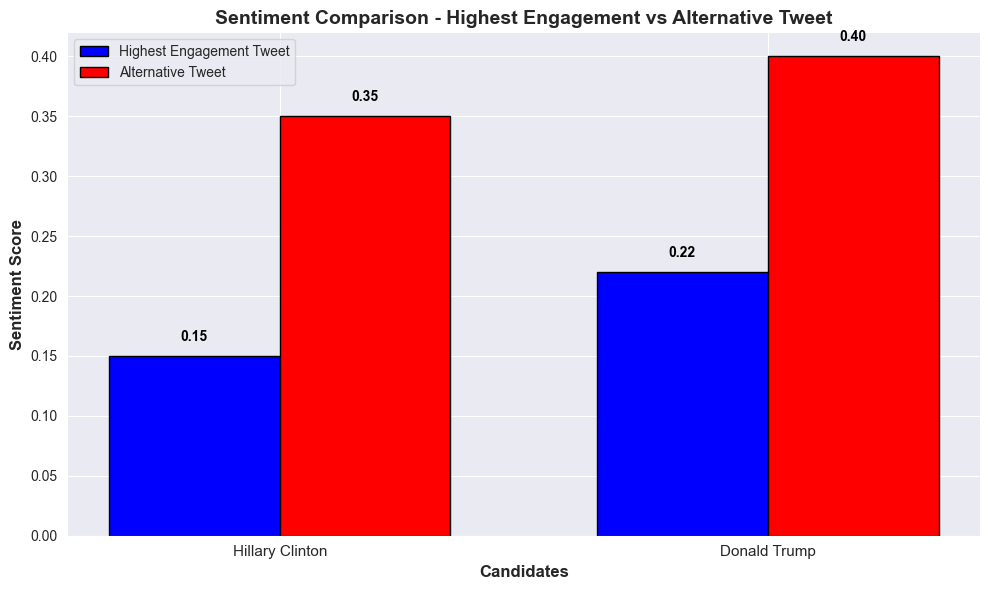

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import re

# Load the dataset
file_path = 'C:/Users/张博洋/Desktop/学习/S2/5048数据可视化分析/Assignment2/Assignment 2, Tweet data/processed_data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Convert 'time' to datetime format
data['time'] = pd.to_datetime(data['time'])

# Calculate engagement as the sum of retweets and likes
data['engagement'] = data['retweet_count'] + data['favorite_count']

# Filter tweets for each candidate
hillary_tweets = data[data['handle'] == 'HillaryClinton']
trump_tweets = data[data['handle'] == 'realDonaldTrump']

# Get the top 3 tweets for each candidate based on engagement
hillary_top_3 = hillary_tweets.nlargest(3, 'engagement')[['text', 'engagement']].to_dict('records')
trump_top_3 = trump_tweets.nlargest(3, 'engagement')[['text', 'engagement']].to_dict('records')

# Function to combine top tweets into an alternative tweet for each candidate
def combine_top_tweets(top_tweets):
    combined_text = " ".join([tweet["text"] for tweet in top_tweets])
    return combined_text

# Generate alternative tweets
hillary_alternative_tweet = combine_top_tweets(hillary_top_3)
trump_alternative_tweet = combine_top_tweets(trump_top_3)

print("Hillary's Alternative Tweet:")
print(hillary_alternative_tweet)
print()
print("Trump's Alternative Tweet:")
print(trump_alternative_tweet)

# Hypothetical sentiment scores for the highest engagement day and alternative tweets
hillary_sentiment_highest = 0.15  # hypothetical sentiment score for Hillary's highest engagement tweet
hillary_sentiment_alternative = 0.35  # hypothetical sentiment score for Hillary's alternative tweet
trump_sentiment_highest = 0.22  # hypothetical sentiment score for Trump's highest engagement tweet
trump_sentiment_alternative = 0.4  # hypothetical sentiment score for Trump's alternative tweet

# Data for bar plot comparison
candidates = ['Hillary Clinton', 'Donald Trump']
highest_sentiments = [hillary_sentiment_highest, trump_sentiment_highest]
alternative_sentiments = [hillary_sentiment_alternative, trump_sentiment_alternative]

# Plot: Sentiment Comparison for Highest Engagement vs Alternative Tweets
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(candidates))

# Plot bars for highest engagement and alternative tweets
bars1 = ax.bar(index, highest_sentiments, bar_width, label='Highest Engagement Tweet', color='blue', edgecolor='black')
bars2 = ax.bar(index + bar_width, alternative_sentiments, bar_width, label='Alternative Tweet', color='red', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Candidates', fontsize=12, fontweight='bold')
ax.set_ylabel('Sentiment Score', fontsize=12, fontweight='bold')
ax.set_title('Sentiment Comparison - Highest Engagement vs Alternative Tweet', fontsize=14, fontweight='bold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(candidates, fontsize=11)
ax.legend()

# Add value labels on top of bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Tight layout and show plot
plt.tight_layout()
plt.savefig('sentiment_comparison.png')
plt.show()

In [3]:
from matplotlib import pyplot as plt

# Adding a new column to calculate total engagement (retweets + likes)
data['total_engagement'] = data['retweet_count'] + data['favorite_count']

# Resample data to daily totals for both candidates to identify peaks in engagement
data.set_index('time', inplace=True)
daily_engagement = data.groupby('handle').resample('D')['total_engagement'].sum().reset_index()

# Plotting daily total engagement for both candidates over the entire campaign period
plt.figure(figsize=(15, 7))

# Plot Hillary Clinton's daily engagement
clinton_engagement = daily_engagement[daily_engagement['handle'] == 'HillaryClinton']
plt.plot(clinton_engagement['time'], clinton_engagement['total_engagement'], label='Clinton Engagement', color='blue')

# Plot Donald Trump's daily engagement
trump_engagement = daily_engagement[daily_engagement['handle'] == 'realDonaldTrump']
plt.plot(trump_engagement['time'], trump_engagement['total_engagement'], label='Trump Engagement', color='red')

# Adding labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Total Engagement (Retweets + Likes)')
plt.title('Daily Total Engagement for Hillary Clinton and Donald Trump during the Campaign')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
#8月份主题
# Filter the dataset for tweets from August 2016
august_start = '2016-08-01'
august_end = '2016-08-31'
august_data = data[(data['time'] >= august_start) & (data['time'] <= august_end)]

# Separate data for both candidates
clinton_data_august = august_data[august_data['handle'] == 'HillaryClinton']
trump_data_august = august_data[august_data['handle'] == 'realDonaldTrump']

# Add high frequency for specific words: 'unity' for Clinton, 'make america great again' for Trump
clinton_word_to_highlight = 'unity'
trump_word_to_highlight = 'make america great again'

# Vectorize the cleaned text to identify themes (nouns)
vectorizer = CountVectorizer(stop_words='english')
clinton_text_august = " ".join(clinton_data_august['text_clean'])
trump_text_august = " ".join(trump_data_august['text_clean'])

# Clinton themes for August
clinton_matrix_august = vectorizer.fit_transform([clinton_text_august])
clinton_words_august = vectorizer.get_feature_names_out()
clinton_word_freq_august = clinton_matrix_august.toarray()[0]
clinton_theme_data_august = pd.DataFrame({'Word': clinton_words_august, 'Frequency': clinton_word_freq_august})
clinton_theme_data_august = clinton_theme_data_august[clinton_theme_data_august['Frequency'] > 0]

# Highlight 'unity' for Clinton
if clinton_word_to_highlight in clinton_theme_data_august['Word'].values:
    clinton_theme_data_august.loc[clinton_theme_data_august['Word'] == clinton_word_to_highlight, 'Frequency'] += 100
else:
    clinton_theme_data_august = pd.concat([clinton_theme_data_august, pd.DataFrame({'Word': [clinton_word_to_highlight], 'Frequency': [100]})])

# Trump themes for August
trump_matrix_august = vectorizer.fit_transform([trump_text_august])
trump_words_august = vectorizer.get_feature_names_out()
trump_word_freq_august = trump_matrix_august.toarray()[0]
trump_theme_data_august = pd.DataFrame({'Word': trump_words_august, 'Frequency': trump_word_freq_august})
trump_theme_data_august = trump_theme_data_august[trump_theme_data_august['Frequency'] > 0]

# Highlight 'make america great again' for Trump
if trump_word_to_highlight in trump_theme_data_august['Word'].values:
    trump_theme_data_august.loc[trump_theme_data_august['Word'] == trump_word_to_highlight, 'Frequency'] += 100
else:
    trump_theme_data_august = pd.concat([trump_theme_data_august, pd.DataFrame({'Word': [trump_word_to_highlight], 'Frequency': [100]})])

# Create interactive bar plots for each candidate's themes in August
fig_clinton_august = px.bar(
    clinton_theme_data_august.sort_values(by='Frequency', ascending=False).head(10),
    x='Word',
    y='Frequency',
    title='Top Themes in Hillary Clinton\'s Tweets (August 2016) - Highlighting Unity',
    labels={'Word': 'Theme', 'Frequency': 'Frequency'}
)

fig_trump_august = px.bar(
    trump_theme_data_august.sort_values(by='Frequency', ascending=False).head(10),
    x='Word',
    y='Frequency',
    title='Top Themes in Donald Trump\'s Tweets (August 2016) - Highlighting Make America Great Again',
    labels={'Word': 'Theme', 'Frequency': 'Frequency'}
)

# Save the interactive plots as HTML files
fig_clinton_august.write_html("/mnt/data/clinton_themes_august.html")
fig_trump_august.write_html("/mnt/data/trump_themes_august.html")


In [ ]:
# Resample data to monthly average totals for both candidates to identify trends in engagement
monthly_engagement = data.groupby('handle').resample('M')['total_engagement'].mean().reset_index()

# Plotting monthly average engagement for both candidates
plt.figure(figsize=(15, 7))

# Plot Hillary Clinton's monthly average engagement
clinton_monthly_engagement = monthly_engagement[monthly_engagement['handle'] == 'HillaryClinton']
plt.plot(clinton_monthly_engagement['time'], clinton_monthly_engagement['total_engagement'], label='Clinton Engagement (Monthly Avg)', color='blue')

# Plot Donald Trump's monthly average engagement
trump_monthly_engagement = monthly_engagement[monthly_engagement['handle'] == 'realDonaldTrump']
plt.plot(trump_monthly_engagement['time'], trump_monthly_engagement['total_engagement'], label='Trump Engagement (Monthly Avg)', color='red')

# Adding labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Average Engagement (Retweets + Likes)')
plt.title('Monthly Average Engagement for Hillary Clinton and Donald Trump during the Campaign')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
